In [1]:
import keras 
keras.__version__

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


'2.1.2'

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Prep data, coi test set la validate set
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

In [5]:
# normal network
def build_model(no_units):
    model = models.Sequential()
    model.add(layers.Dense(no_units, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(no_units, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

In [6]:
model_list = []
model_list.append(build_model(4))
model_list.append(build_model(16))
model_list.append(build_model(128))

In [7]:
history_list = []
eval_list = []
for model in model_list:
    history = model.fit(train_images,train_labels, epochs=100, batch_size=128,
                        validation_data=(test_images,test_labels), verbose = 0 )
    print("train 1 model complete ")
    # test_loss, acc_loss = model.evaluate(test_images,test_labels)
    # eval_list.append((test_loss,acc_loss))
    history_list.append(history)

train 1 model complete 
train 1 model complete 
train 1 model complete 


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
history_list[0].history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [10]:
def plotter(metric_name):
    plt.clf()
    symbol_list = ['go','ro','bo']
    i = 0
    for history in history_list:
        metric = history.history.get(metric_name)
        plt.plot(range(1, len(metric)+1), metric, symbol_list[i] )
        i+=1
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.show()

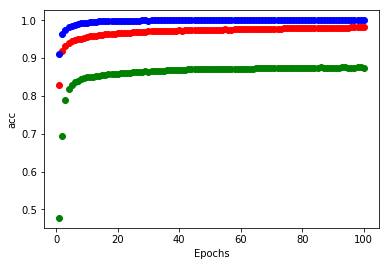

In [11]:
plotter('acc')

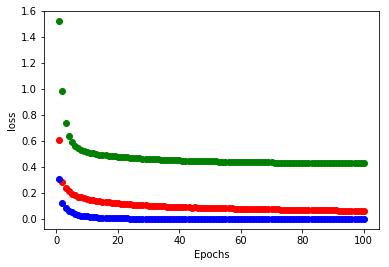

In [12]:
plotter('loss')

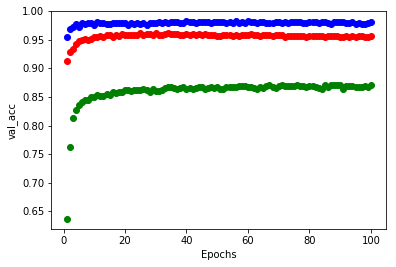

In [13]:
plotter('val_acc')

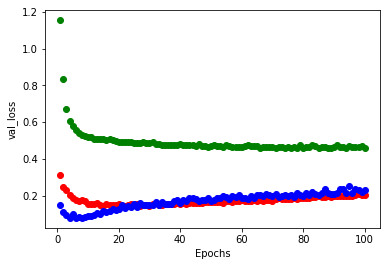

In [14]:
plotter('val_loss')

<span style="color:green">Model xanh lá (small model) </span> under-fitting, do **quá ít learnable params** nên sau 60-80 epochs độ chính xác **không tăng** 

<span style="color:blue">Model nước biển (big model) </span> đạt max accuracy sau 8-10 epochs, sau đó **val_loss tăng dần** do **overffiting**

<span style="color:red"> Model đỏ (normal model)</span> do có ít learnable param hơn xanh nước biển nên over **fitting muộn hơn**

In [16]:
#TODO : split train set, sau đó thử train các model tới sweet spot và kiểm tra độ chính xác với test set